In [1]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

filename = environ['input_data_fp']
fig_no = int(environ['input_fig_number'])
fig_no = 30
if fig_no == 1:
    fig_size = 10
else:
    fig_size = 30

pd.options.display.float_format = '{:10,.2f}'.format
pd.set_option('display.width', 999)

key_index = ['actual_paint_frames',
            'expected_frames', 
            'frame_throughput',
            'long_frame']

with open(filename) as data_file:
    data = json.load(data_file)
fps = data["video-recording-fps"]
remove_data = ["video-recording-fps"]
for item in remove_data:
    del data[item]
cols = list()
d = pd.DataFrame(data)
for col in d:
    cols.append(str(col))

cols[0]

/Users/mlien/Workspace/Hasal/.env-python/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


'test_chrome_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [2]:
df = pd.concat([pd.DataFrame(d.loc[:, cols[0]]['time_list']).T], axis=1)
dft = df.loc[key_index, :]
dft

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
actual_paint_frames,116,115,115,115,115,114,118,115,115,118,...,116,117,116,115,115,116,114,114,115,115
expected_frames,626,626,625,625,625,626,626,626,626,626,...,626,626,624,626,626,624,626,626,626,626
frame_throughput,0.19,0.18,0.18,0.18,0.18,0.18,0.19,0.18,0.18,0.19,...,0.19,0.19,0.19,0.18,0.18,0.19,0.18,0.18,0.18,0.18
long_frame,88.89,88.89,88.89,88.89,88.89,88.89,88.89,88.89,88.89,88.89,...,88.89,88.89,100.00,100.00,88.89,88.89,88.89,88.89,88.89,88.89


In [3]:
cols[1]

'test_firefox_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [4]:
df = pd.concat([pd.DataFrame(d.loc[:, cols[1]]['time_list']).T], axis=1)
dft = df.loc[key_index, :]
dft

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
actual_paint_frames,120,117,115,119,114,115,115,118,116,118,...,118,113,121,118,118,117,117,118,117,121
expected_frames,628,625,624,627,624,628,625,627,624,622,...,626,626,626,623,627,624,622,625,623,624
frame_throughput,0.19,0.19,0.18,0.19,0.18,0.18,0.18,0.19,0.19,0.19,...,0.19,0.18,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
long_frame,100.00,133.33,200.00,122.22,244.44,177.78,166.67,133.33,177.78,122.22,...,166.67,355.56,133.33,188.89,177.78,122.22,255.56,177.78,233.33,200.00


In [5]:
non_freeze_frame_timestamps = pd.concat([pd.DataFrame(d[column]['time_list']) for column in d], axis=1).loc[:,'non_freeze_frame_timestamps']
non_freeze_frame_timestamps.columns = d.columns
case_name_list = list(non_freeze_frame_timestamps)

case = case_name_list[0]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [6]:
str(case)

'test_chrome_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [7]:
frame

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,6.00,8.00,8.00,6.00,8.00,7.00,6.00,8.00,8.00,8.00,...,6.00,8.00,7.00,9.00,7.00,7.00,7.00,7.00,8.00,7.00
3,2.00,1.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,...,2.00,1.00,2.00,1.00,2.00,2.00,2.00,2.00,1.00,2.00
4,1.00,2.00,5.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,...,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00
5,2.00,3.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,...,2.00,1.00,2.00,1.00,2.00,3.00,2.00,2.00,1.00,2.00
6,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,...,1.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00
7,2.00,2.00,1.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,...,2.00,1.00,2.00,1.00,2.00,1.00,2.00,3.00,1.00,2.00
8,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,...,1.00,2.00,1.00,2.00,1.00,2.00,1.00,2.00,2.00,1.00
9,2.00,2.00,4.00,2.00,1.00,2.00,2.00,1.00,1.00,1.00,...,2.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
10,3.00,4.00,8.00,1.00,2.00,6.00,1.00,2.00,2.00,2.00,...,1.00,2.00,6.00,6.00,1.00,5.00,1.00,6.00,2.00,1.00


In [8]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.25,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
0.50,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
0.75,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
0.95,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,...,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00
0.99,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,...,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00


In [9]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,115.00,114.00,114.00,114.00,114.00,113.00,117.00,114.00,114.00,117.00,...,115.00,116.00,115.00,114.00,114.00,115.00,113.00,113.00,114.00,114.00
mean,5.43,5.48,5.47,5.47,5.47,5.53,5.34,5.48,5.48,5.34,...,5.43,5.39,5.42,5.48,5.48,5.42,5.53,5.53,5.48,5.48
std,1.89,1.88,1.90,1.83,1.92,1.87,1.98,1.88,1.94,2.02,...,1.90,1.96,1.94,1.94,1.87,1.92,1.86,1.79,1.92,1.88
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
50%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
75%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00
max,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,8.00,...,8.00,8.00,9.00,9.00,8.00,8.00,8.00,8.00,8.00,8.00


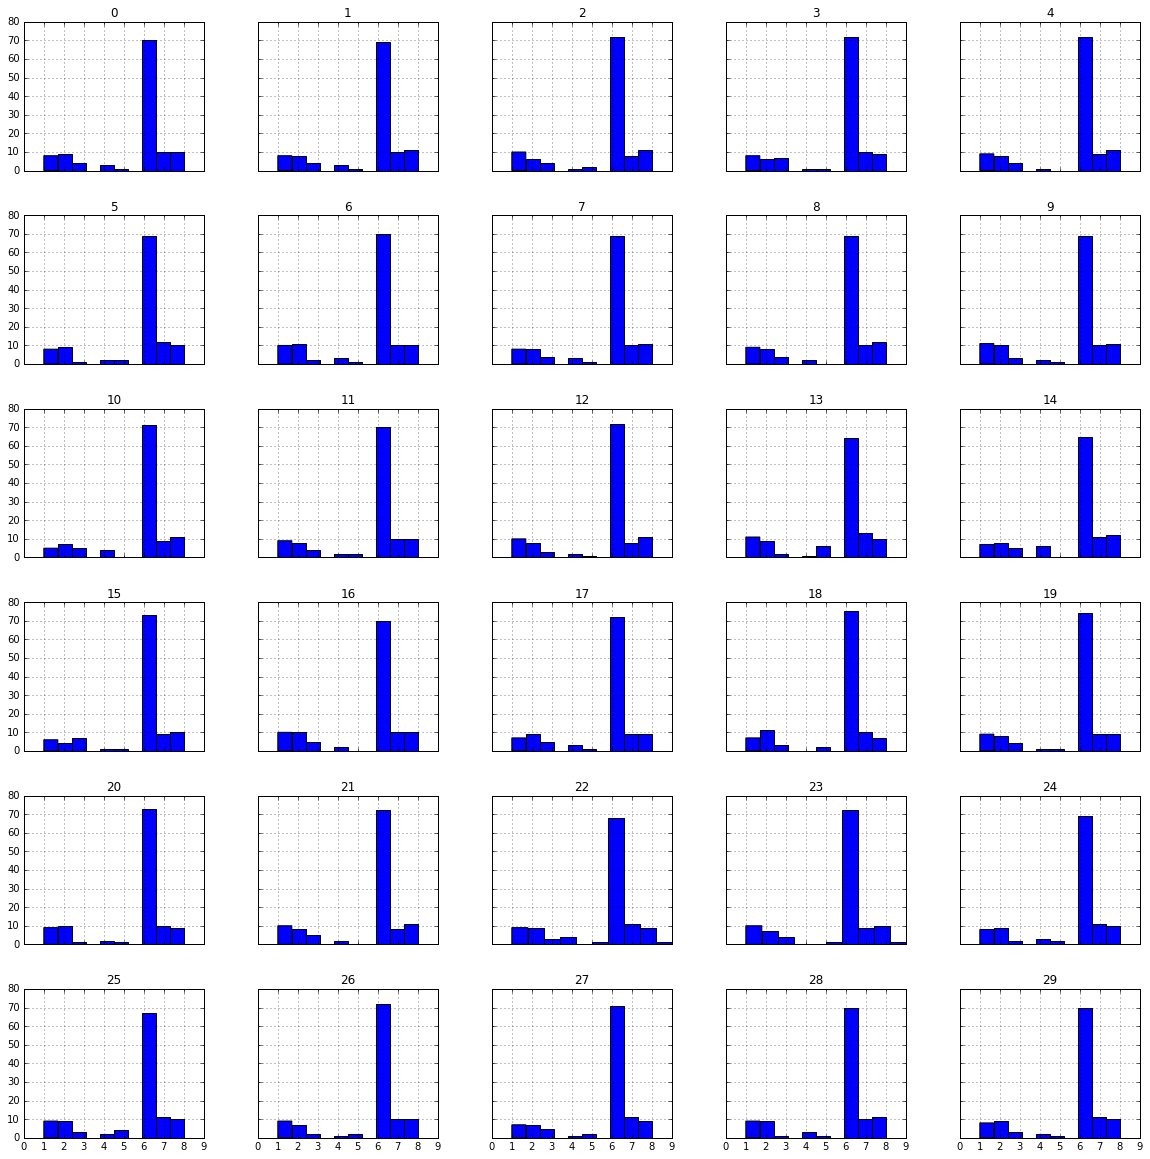

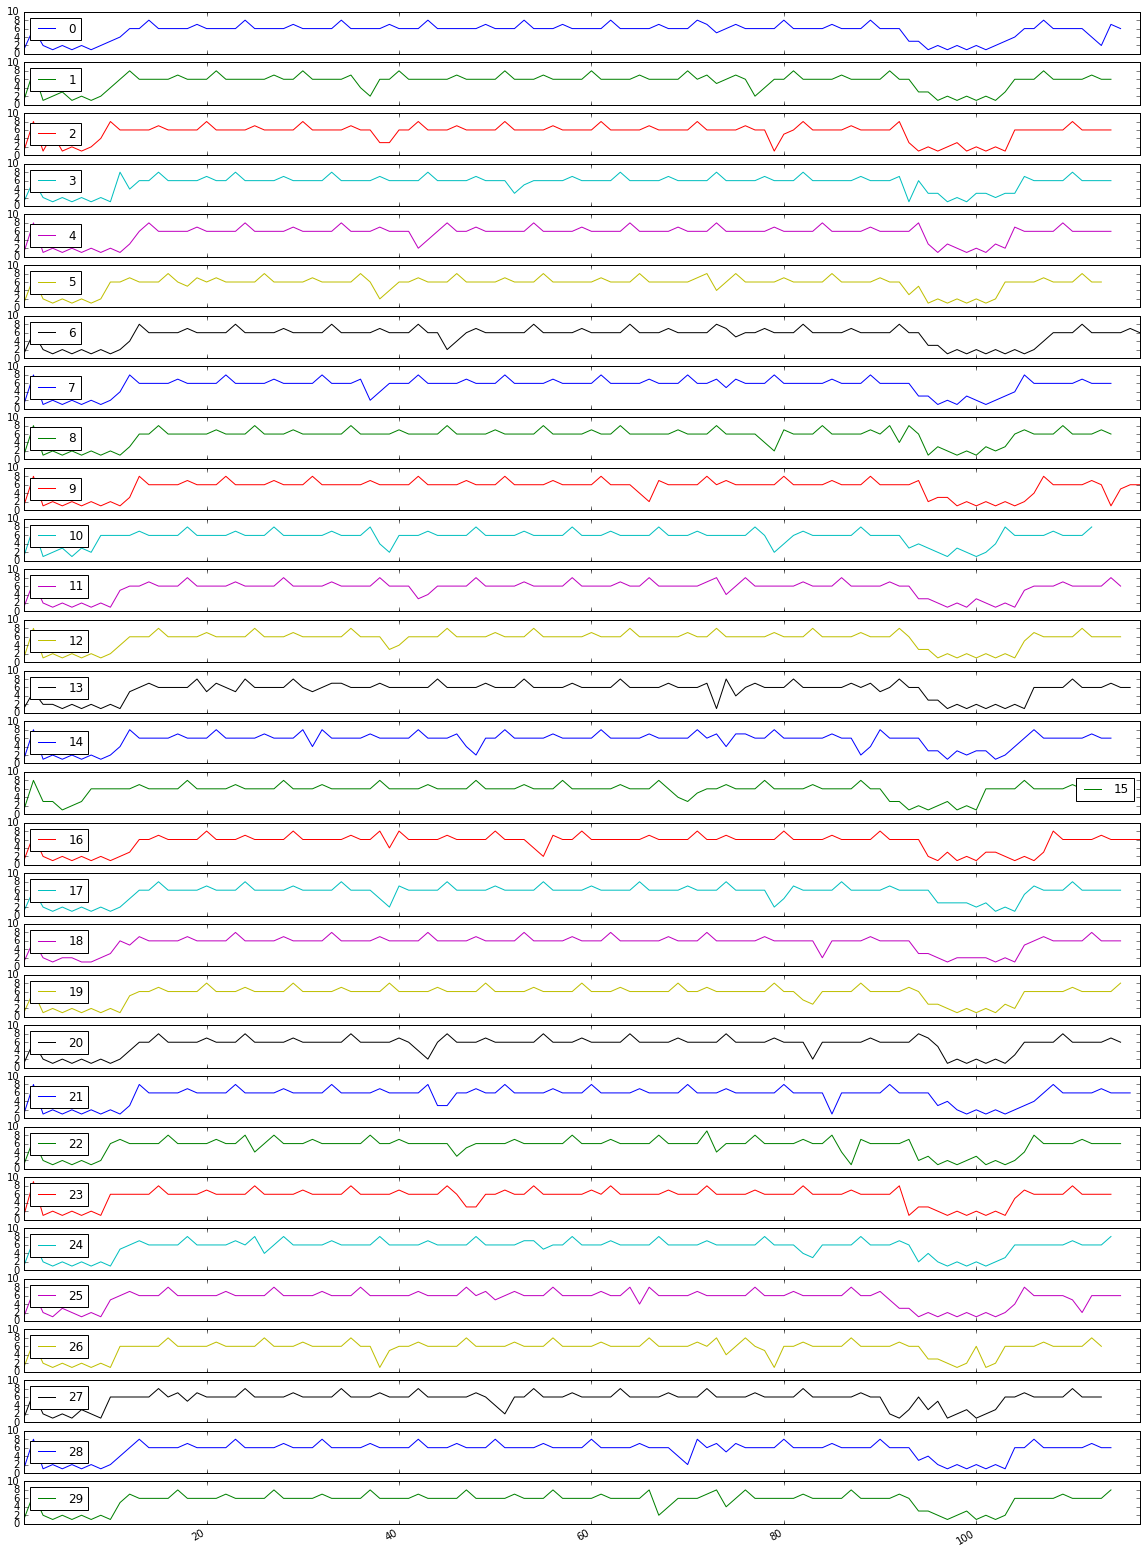

In [10]:
max_y = 0
for col in frame:
    if max(frame[col]) > max_y:
        max_y = max(frame[col])
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()

In [11]:
sum(frame.corr().cumsum().T[frame.shape[1]-1])

645.49903350982981

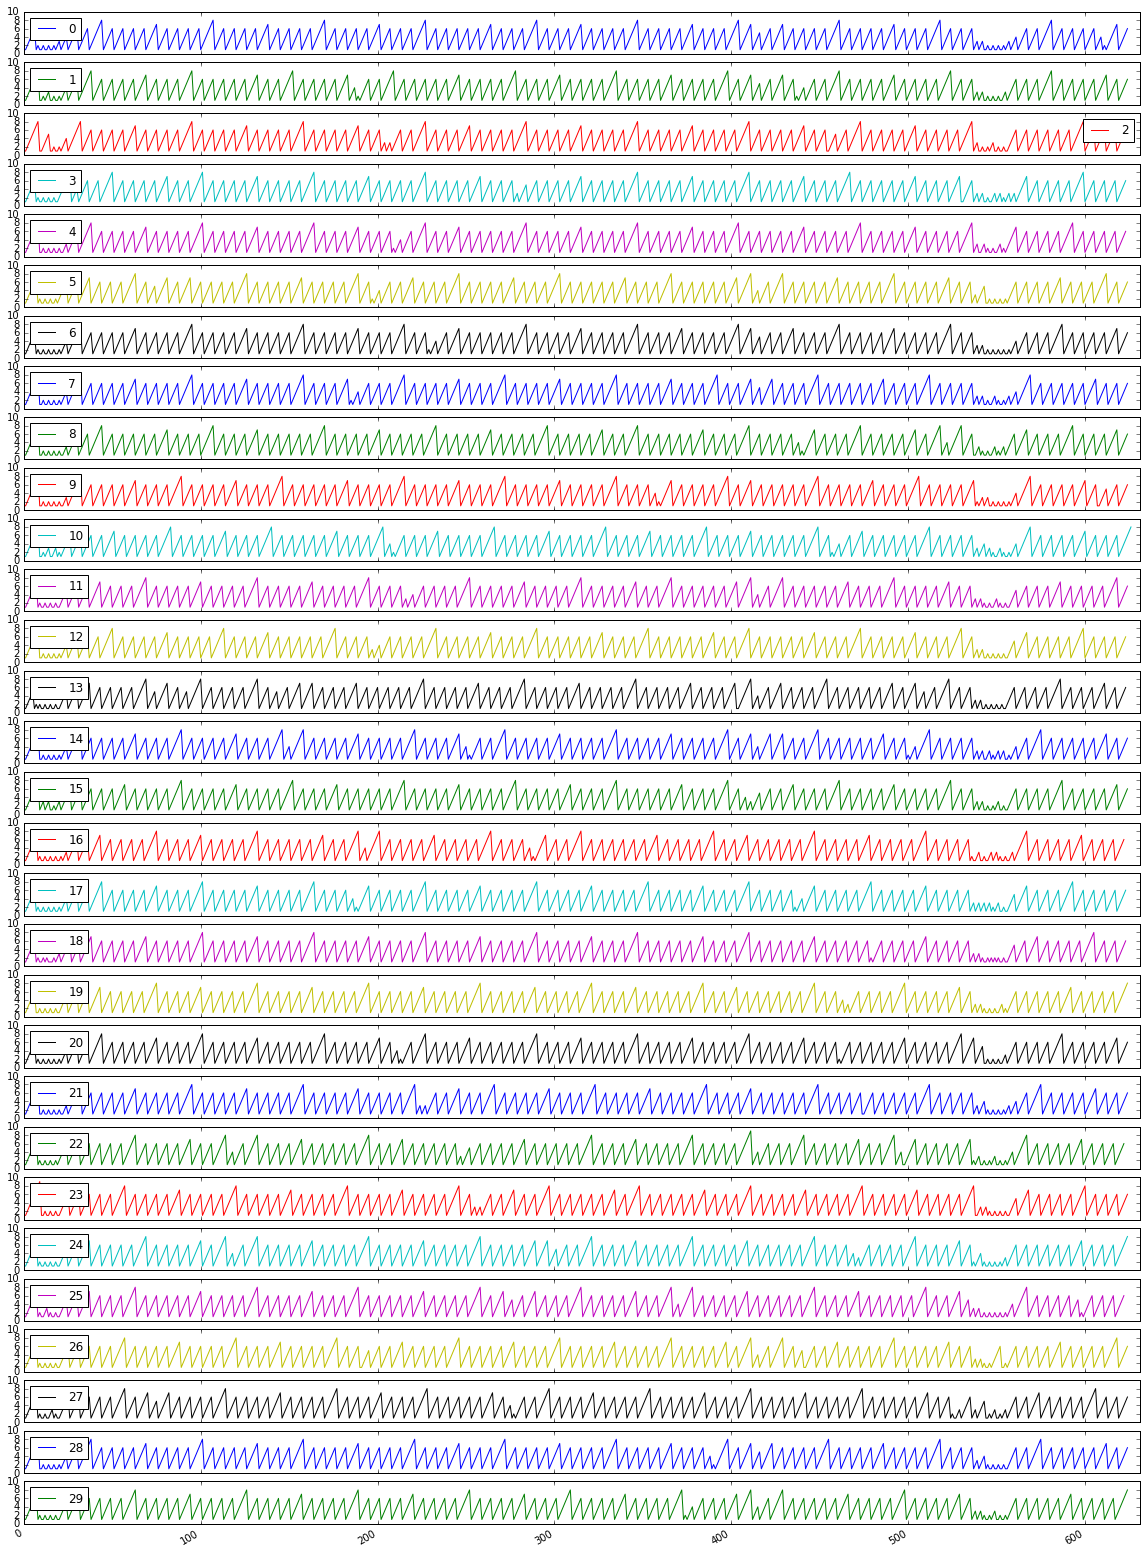

In [12]:
out_data = []
for col in frame:
    data = []
    new_data = []
    for num_dup_frame in frame[col]:
        if num_dup_frame > 1:
            data.append(pd.Series(list(np.arange(1, num_dup_frame + 1))))
        else:
            data.append(pd.Series([num_dup_frame]))
    new_data = pd.concat(data, ignore_index=True)
    out_data.append(new_data)
out_data = pd.concat(out_data, ignore_index=True, axis=1)
out_data.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()

In [13]:
sum(out_data.corr().cumsum().T[out_data.shape[1]-1])

425.85806259215082

In [14]:
case = case_name_list[1]
c = non_freeze_frame_timestamps[case]
frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T


In [15]:
str(case)

'test_firefox_facebook_ft_type_composerbox_100_txt_delay_50ms'

In [16]:
frame

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,9.00,12.00,18.00,11.00,22.00,16.00,15.00,12.00,16.00,9.00,...,15.00,16.00,12.00,17.00,16.00,11.00,23.00,16.00,21.00,18.00
3,3.00,9.00,1.00,8.00,2.00,4.00,5.00,1.00,4.00,3.00,...,6.00,5.00,1.00,6.00,4.00,8.00,2.00,4.00,2.00,3.00
4,6.00,2.00,9.00,3.00,6.00,6.00,6.00,5.00,6.00,9.00,...,4.00,6.00,5.00,3.00,6.00,3.00,9.00,6.00,6.00,6.00
5,3.00,6.00,11.00,4.00,6.00,2.00,4.00,1.00,6.00,2.00,...,5.00,1.00,1.00,6.00,2.00,6.00,3.00,2.00,6.00,3.00
6,3.00,6.00,7.00,5.00,3.00,3.00,5.00,2.00,3.00,6.00,...,3.00,3.00,3.00,4.00,3.00,3.00,4.00,3.00,1.00,4.00
7,2.00,4.00,5.00,3.00,3.00,4.00,1.00,3.00,3.00,4.00,...,3.00,5.00,3.00,3.00,4.00,4.00,4.00,4.00,2.00,2.00
8,1.00,5.00,7.00,4.00,3.00,3.00,8.00,3.00,6.00,5.00,...,7.00,3.00,6.00,6.00,3.00,3.00,4.00,3.00,4.00,3.00
9,5.00,4.00,6.00,6.00,1.00,6.00,6.00,4.00,6.00,4.00,...,6.00,6.00,8.00,3.00,5.00,6.00,3.00,6.00,8.00,3.00
10,7.00,8.00,5.00,6.00,10.00,6.00,8.00,6.00,8.00,3.00,...,5.00,4.00,6.00,9.00,7.00,6.00,6.00,6.00,7.00,6.00


In [17]:
frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,1.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,2.00,...,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00,1.00
0.25,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,...,4.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00
0.50,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00
0.75,6.00,7.00,6.00,6.00,6.00,6.00,7.00,7.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00
0.95,8.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,...,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
0.99,9.00,10.00,11.00,9.00,11.00,15.00,10.00,9.00,9.00,9.00,...,9.00,17.00,9.00,10.00,9.00,11.00,10.00,11.00,9.00,9.00


In [18]:
frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,119.00,116.00,114.00,118.00,113.00,114.00,114.00,117.00,115.00,117.00,...,117.00,112.00,120.00,117.00,117.00,116.00,116.00,117.00,116.00,120.00
mean,5.27,5.38,5.46,5.31,5.51,5.50,5.47,5.35,5.42,5.31,...,5.34,5.58,5.21,5.32,5.35,5.37,5.35,5.33,5.36,5.19
std,1.96,2.33,2.39,2.20,2.73,2.64,2.37,2.31,2.26,2.16,...,2.30,3.80,2.40,2.36,2.43,2.09,2.75,2.43,2.59,2.41
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,4.00,...,4.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00
50%,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00
75%,6.00,7.00,6.00,6.00,6.00,6.00,7.00,7.00,6.00,6.00,...,6.00,6.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00
max,9.00,12.00,18.00,11.00,22.00,16.00,15.00,12.00,16.00,11.00,...,15.00,32.00,12.00,17.00,16.00,11.00,23.00,16.00,21.00,18.00


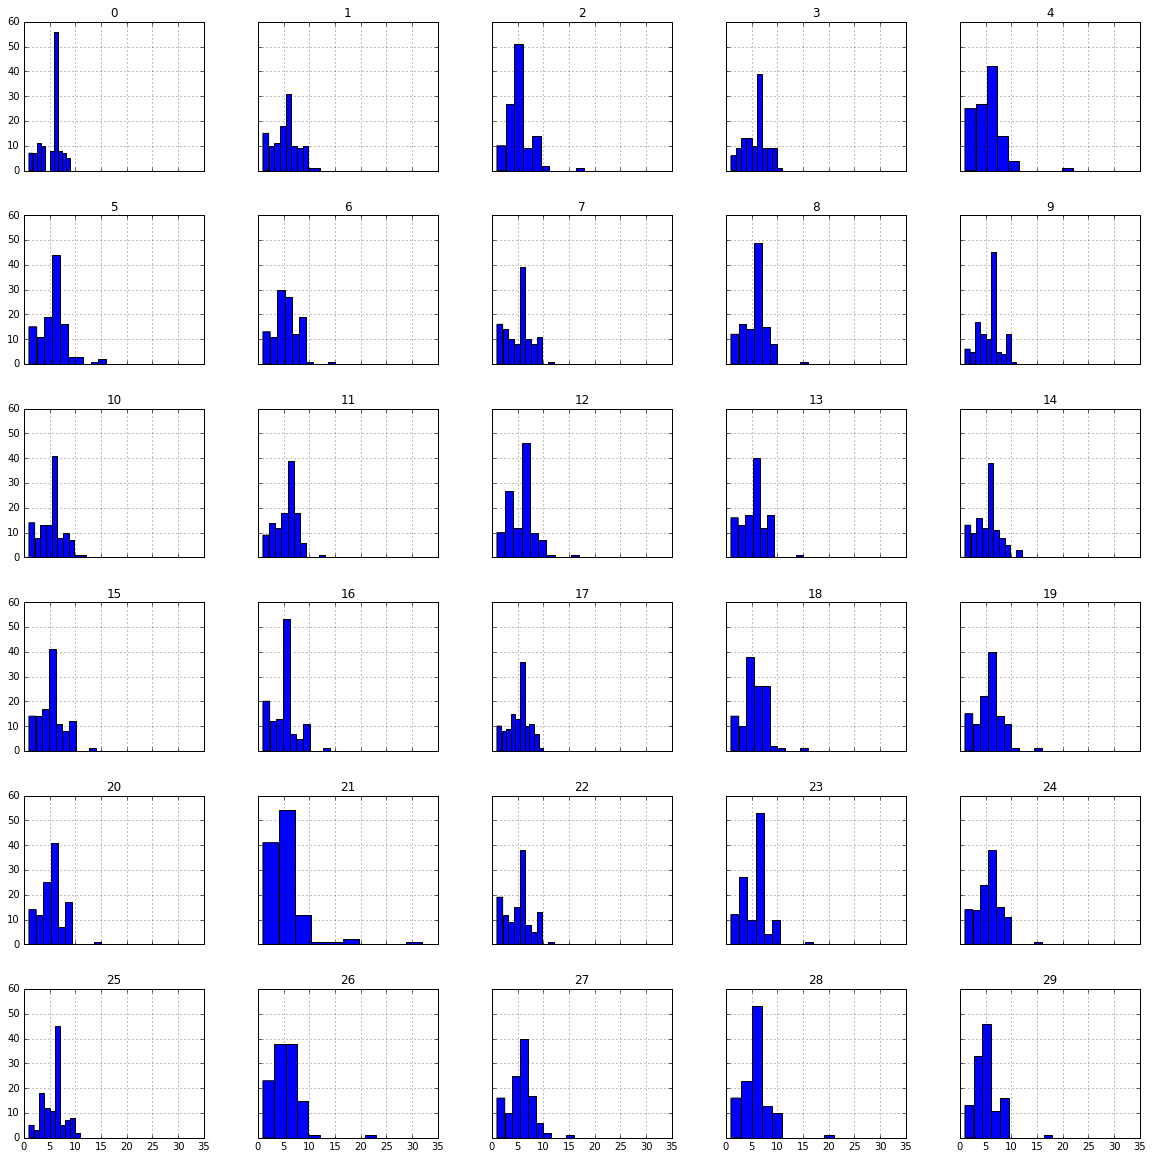

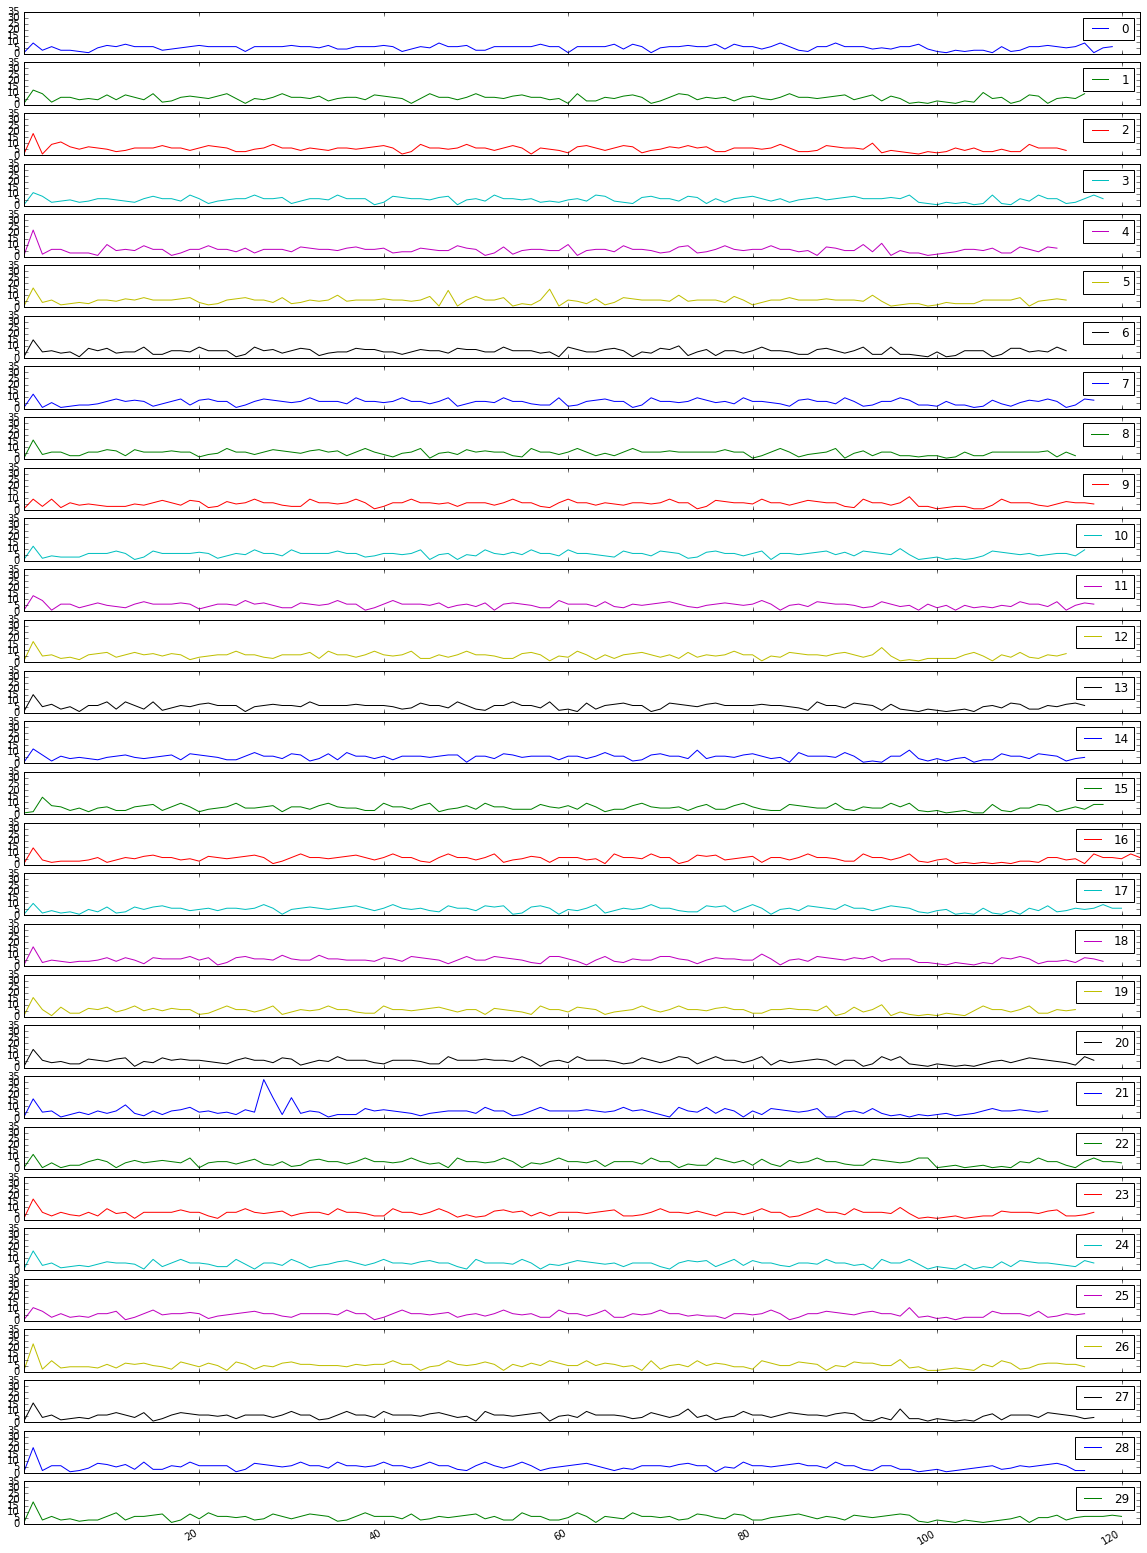

In [19]:
max_y = 0
for col in frame:
    if max(frame[col]) > max_y:
        max_y = max(frame[col])
frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()

In [20]:
sum(frame.corr().cumsum().T[frame.shape[1]-1])

260.99213805109582

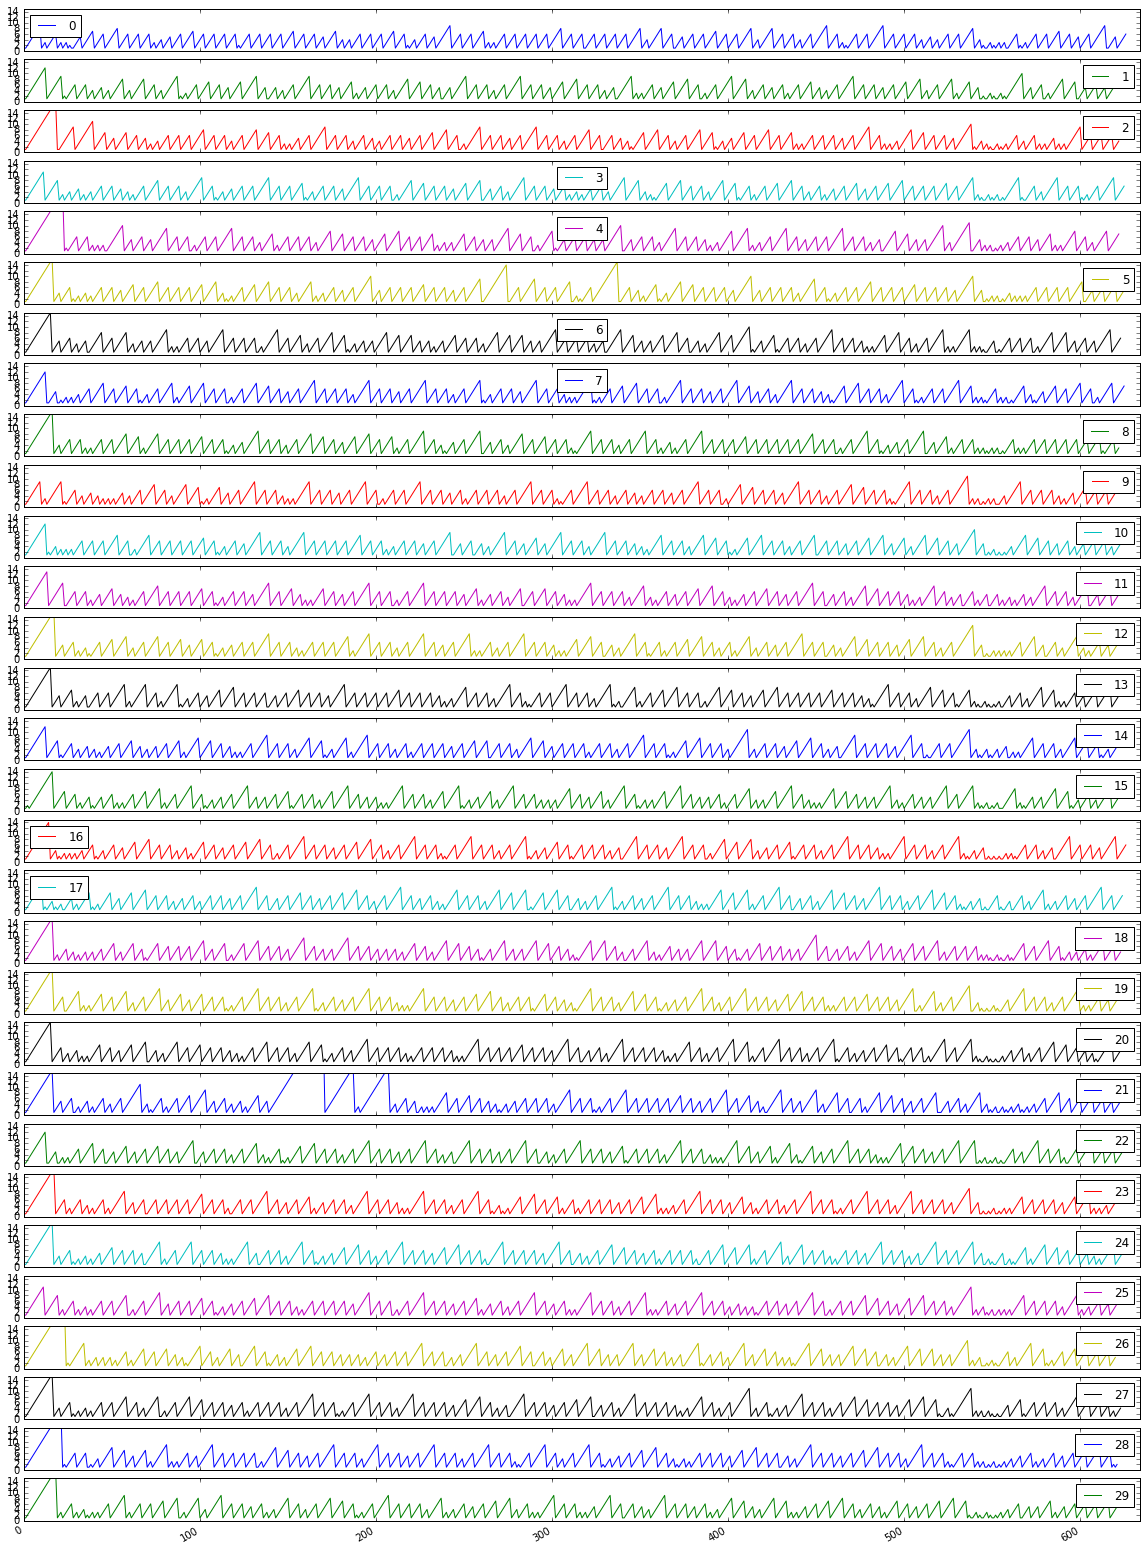

In [24]:
out_data = []
for col in frame:
    data = []
    new_data = []
    for num_dup_frame in frame[col]:
        if num_dup_frame > 1:
            data.append(pd.Series(list(np.arange(1, num_dup_frame + 1))))
        else:
            data.append(pd.Series([num_dup_frame]))
    new_data = pd.concat(data, ignore_index=True)
    out_data.append(new_data)
out_data = pd.concat(out_data, ignore_index=True, axis=1)
out_data.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()

In [22]:
sum(out_data.corr().cumsum().T[out_data.shape[1]-1])

167.41392589784752